https://www.santepubliquefrance.fr/

https://world.openfoodfacts.org/

https://world.openfoodfacts.org/data/data-fields.txt

Librairies

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
plt.style.use('fivethirtyeight')

# Loading data

In [100]:
data_full = pd.read_csv("/content/drive/My Drive/DATASETS/ML/P2/en.openfoodfacts.org.products.csv",sep="\t",encoding='utf8')
data_full.shape

(1486047, 182)

In [101]:
startinglen = data_full.shape[0]

In [102]:
duplicates = data_full.duplicated()
len(data_full[duplicates])

1

* 1 duplicates

In [103]:
data=data_full.drop_duplicates()

In [104]:
duplicates = data_full.duplicated(subset = "code")
len(data_full[duplicates])

326

* 326 duplicates code

In [105]:
data_full = data_full.drop_duplicates(subset = "code")

In [106]:
len(data[data["countries_en"]=="France"])

653641

In [107]:
print("Number of products for France: " + str(len(data[data["countries_en"]=="France"])))

Number of products for France: 653641


In [108]:
print("% of products form France: " + str(round(len(data[data["countries_en"]=="France"])/len(data)*100,2)) + "%")

% of products form France: 43.99%


## selecting countries variables

SELECT FROM COLUMNS

In [109]:
col_countries = data.filter(regex=("countries")).columns
col_countries

Index(['countries', 'countries_tags', 'countries_en'], dtype='object')

In [110]:
data["countries"]

0             France
1             France
2              en:es
3             France
4          en:France
             ...    
1486042        en:be
1486043        en:gb
1486044        en:re
1486045        en:be
1486046    en:France
Name: countries, Length: 1486046, dtype: object

In [111]:
word = data["countries"][4]
parts = word.split(':')
keep = parts[1]
print(keep)

France


In [112]:
data.countries = data.countries.str.lower()
data.countries_tags = data.countries_tags.str.lower()
data.countries_en = data.countries_en.str.lower()

In [113]:
data["countries"] = data["countries"].astype(str)
data["countries_tags"] = data["countries_tags"].astype(str)
data["countries_en"] = data["countries_en"].astype(str)

In [114]:
def second(string):
  if ":" in string :
    parts = string.split(':')
    second_part = parts[1]      
    return second_part
  else :
    return string

for col in col_countries : 
  data[col]=data[col].apply(second)



In [115]:
def cut(string):
  if len(string) <= 2 :
    return np.nan
  else : 
    return string

for col in col_countries : 
  data[col]=data[col].apply(cut)

In [116]:
data[col_countries]

,countries,countries_tags,countries_en
0,france,france,france
1,france,france,france
2,NaN,spain,spain
3,france,france,france
4,france,france,france
...,...,...,...
1486042,NaN,belgium,belgium
1486043,NaN,united-kingdom,united kingdom
1486044,NaN,reunion,réunion
1486045,NaN,belgium,belgium


In [117]:
countries = pd.DataFrame(data[col_countries].isna().sum()).sort_values(by=[0])
to_drop = countries.index.values[1:]

to_drop

array(['countries_en', 'countries'], dtype=object)

In [118]:
data = data.drop(to_drop, axis = 1)

# FRANCE

In [119]:
data = data[data["countries_tags"]=="france"]
data.shape

(653641, 180)

## selecting brands variables

In [120]:
data.brands = data.brands.str.lower()
data.brands_tags = data.brands_tags.str.lower()
brands = pd.DataFrame(data[["brands","brands_tags"]].isna().sum()).sort_values(by=[0])
to_drop = brands.index.values[1]

data = data.drop(to_drop, axis = 1)

In [121]:
col_to_keep = brands.index.values[0]
col_to_keep 

'brands'

## selecting production name variable

In [122]:
col_name = data.filter(regex=("name")).columns
col_name

Index(['product_name', 'generic_name'], dtype='object')

In [123]:
for col in col_name :
  data[col] = data[col].str.lower()
data[col_name]

,product_name,generic_name
0,vitória crackers,NaN
1,cacao,NaN
3,moutarde au moût de raisin,NaN
4,sfiudwx,NaN
5,sauce sweety chili 0%,NaN
...,...,...
1486036,steak haché,NaN
1486037,boules,NaN
1486039,minis beignets,beignets natures sucrés
1486041,steak haché pur boeuf,NaN


In [124]:
products = pd.DataFrame(data[col_name].isna().sum()).sort_values(by=[0])
to_drop = products.index.values[1:]

to_drop

data = data.drop(to_drop, axis = 1)

In [125]:
data["product_name"].isna().sum() / len(data)

0.027831791457390218

* 2% missing product name

## Unused features

In [126]:
val1 = data.shape[1]

to_drop = ["energy_", "nutrition-score" , "carbon","fruits","collagen","glycemic","water"]

for i in to_drop:
    col_name = data.filter(regex=(i)).columns
    data = data.drop(col_name, axis = 1)
    
print("Number of dropped variables: "+ str(val1 - data.shape[1]))

Number of dropped variables: 12


## Missing values

In [127]:
col_nutrition = data.filter(regex=("100g")).columns
data[col_nutrition].isna().sum()

energy-kj_100g          600454
energy-kcal_100g        169860
energy-from-fat_100g    653615
fat_100g                141716
saturated-fat_100g      139602
                         ...  
choline_100g            653616
phylloquinone_100g      653637
beta-glucan_100g        653631
inositol_100g           653621
carnitine_100g          653627
Length: 99, dtype: int64

In [128]:
na_viz=pd.DataFrame(data[col_nutrition].isna().sum())
na_viz=na_viz[na_viz[0]!=0]
print(len(na_viz))

99


* 99 nutrition columns with Na's


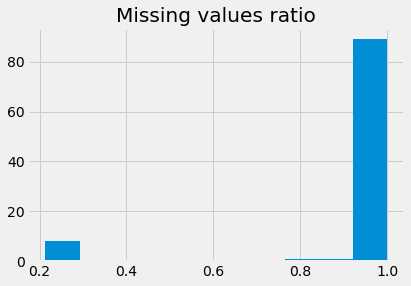

In [129]:
na_viz["ratio"] = na_viz[0]/len(data)
na_viz["ratio"].hist()
plt.title("Missing values ratio")
plt.show()

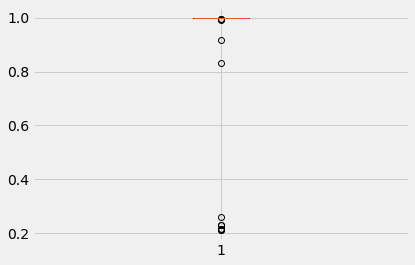

In [130]:
plt.boxplot(na_viz["ratio"])
plt.show()

In [131]:
len(na_viz[na_viz["ratio"]>=0.5])

91

In [132]:
na_list = na_viz[na_viz["ratio"]>=0.5].index
na_list

Index(['energy-kj_100g', 'energy-from-fat_100g', '-butyric-acid_100g',
       '-caproic-acid_100g', '-caprylic-acid_100g', '-capric-acid_100g',
       '-lauric-acid_100g', '-myristic-acid_100g', '-palmitic-acid_100g',
       '-stearic-acid_100g', '-arachidic-acid_100g', '-behenic-acid_100g',
       '-lignoceric-acid_100g', '-cerotic-acid_100g', '-montanic-acid_100g',
       '-melissic-acid_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'omega-3-fat_100g',
       '-alpha-linolenic-acid_100g', '-eicosapentaenoic-acid_100g',
       '-docosahexaenoic-acid_100g', 'omega-6-fat_100g', '-linoleic-acid_100g',
       '-arachidonic-acid_100g', '-gamma-linolenic-acid_100g',
       '-dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g',
       '-oleic-acid_100g', '-elaidic-acid_100g', '-gondoic-acid_100g',
       '-mead-acid_100g', '-erucic-acid_100g', '-nervonic-acid_100g',
       'trans-fat_100g', 'cholesterol_100g', '-sucrose_100g', '-glucose_100g',
       '-fructose_100g

In [133]:
data = data.drop(na_list, axis=1)

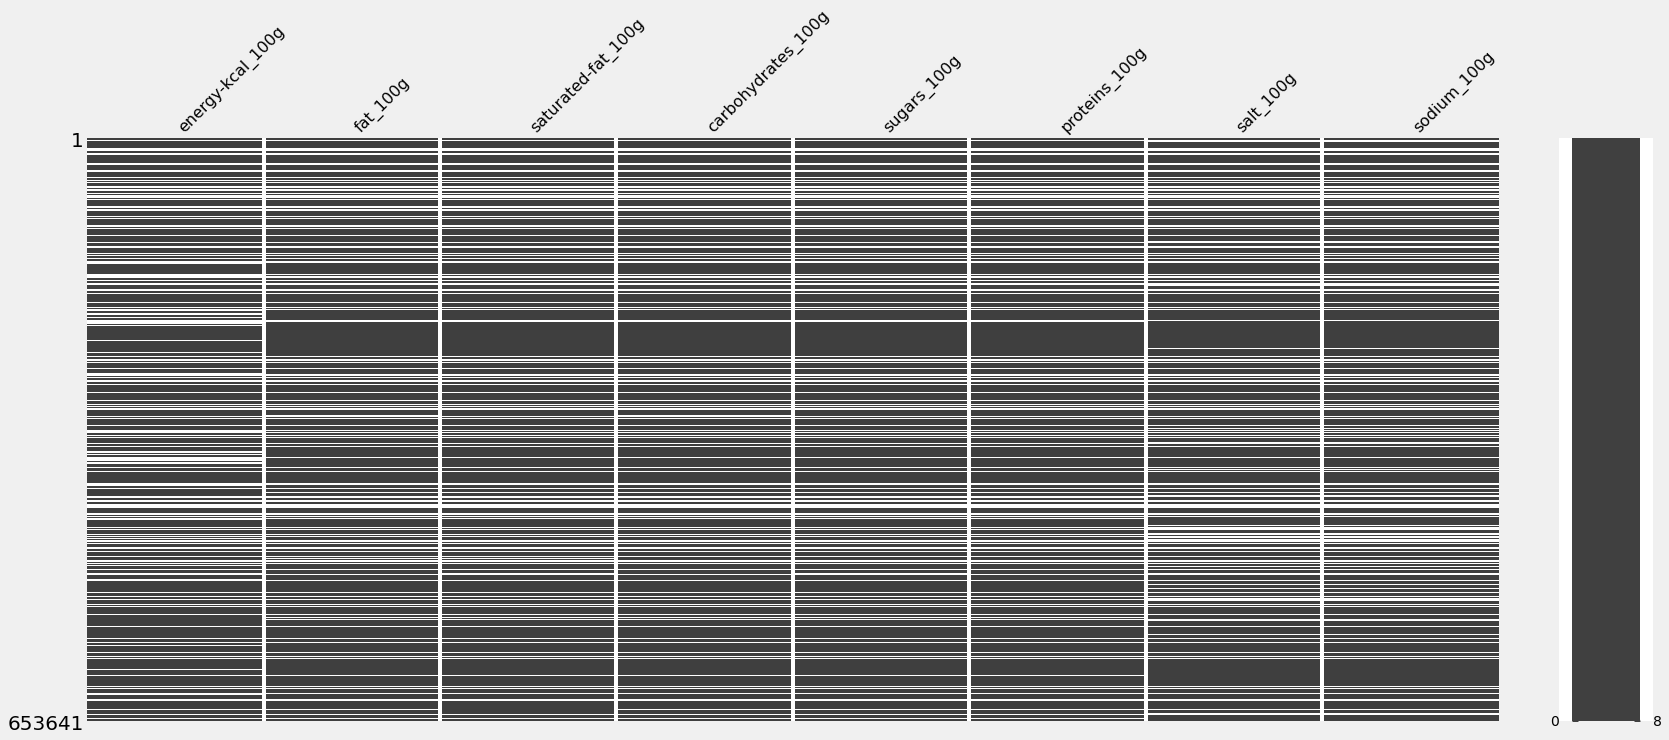

In [134]:
col_nutrition = data.filter(regex=("100g")).columns

msno.matrix(data[col_nutrition])
plt.show()


# Correlation matrix

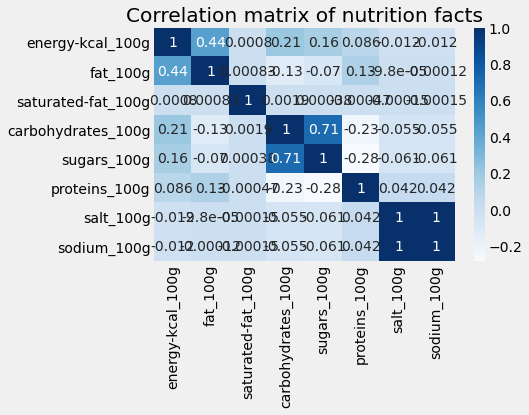

In [135]:
col_nutrition = data.filter(regex=("100g")).columns

# Matrice corrélations
corr_matrix=data[col_nutrition].corr()

sns.heatmap(corr_matrix,annot=True,cmap="Blues")
plt.title("Correlation matrix of nutrition facts")
plt.show()

In [136]:
data = data.drop("sodium_100g", axis = 1)

## Outliers removal

### basics per 100g


In [137]:
col_nutrition = ["proteins_100g","carbohydrates_100g","sugars_100g" ,"fat_100g","saturated-fat_100g"]
data[col_nutrition].head(5)

,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g
0,7.8,70.1,15.0,7.0,3.08
1,NaN,NaN,NaN,NaN,NaN
3,5.1,29.0,22.0,8.2,2.20
4,NaN,NaN,NaN,NaN,NaN
5,0.2,4.8,0.4,0.0,0.00


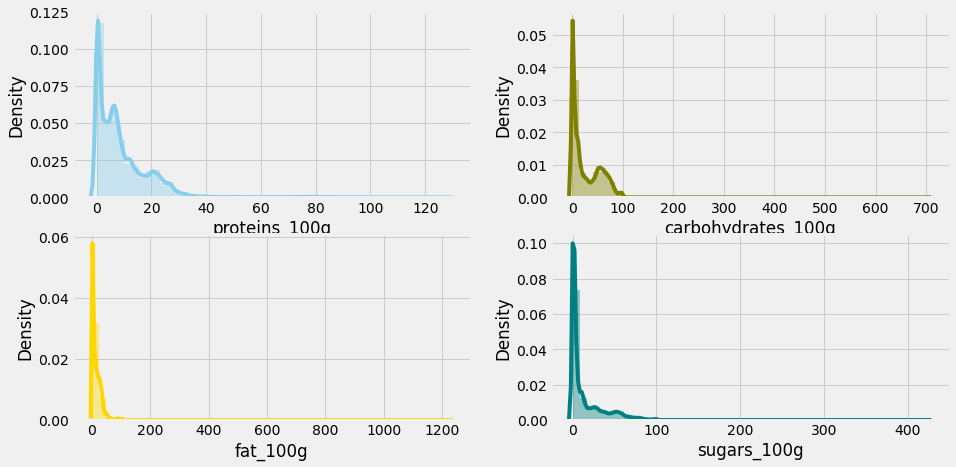

In [138]:
f, axes = plt.subplots(2, 2, figsize=(14, 7))
sns.distplot( data["proteins_100g"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data["carbohydrates_100g"] , color="olive", ax=axes[0, 1])
sns.distplot( data["fat_100g"] , color="gold", ax=axes[1, 0])
sns.distplot( data["sugars_100g"] , color="teal", ax=axes[1, 1])
plt.show()

In [139]:
for col in data[col_nutrition].columns : 
  error = data[(data[col] >= 100)|(data[col] < 0)]
  print(str(len(error)) + " outliers in " + col)
  print(str(len(error)/len(data)*100) + "% of outliers in " + col)


31 outliers in proteins_100g
0.004742664551336284% of outliers in proteins_100g
789 outliers in carbohydrates_100g
0.1207084622904622% of outliers in carbohydrates_100g
576 outliers in sugars_100g
0.08812176714740966% of outliers in sugars_100g
2742 outliers in fat_100g
0.41949632902464806% of outliers in fat_100g
46 outliers in saturated-fat_100g
0.007037502237466744% of outliers in saturated-fat_100g


In [140]:
val1 = data.shape[0] 

for col in data[col_nutrition].columns : 
  index = data[(data[col] >= 100)|(data[col] < 0)].index
  data.drop(index, inplace=True)

val2 = data.shape[0]

print("Number of dropped product: " + str(val1 - val2))

Number of dropped product: 3568


In [141]:
print("Percentage of dropped product: " + str(round(((val1 - val2) / val1)*100,2)) + "%") 

Percentage of dropped product: 0.55%


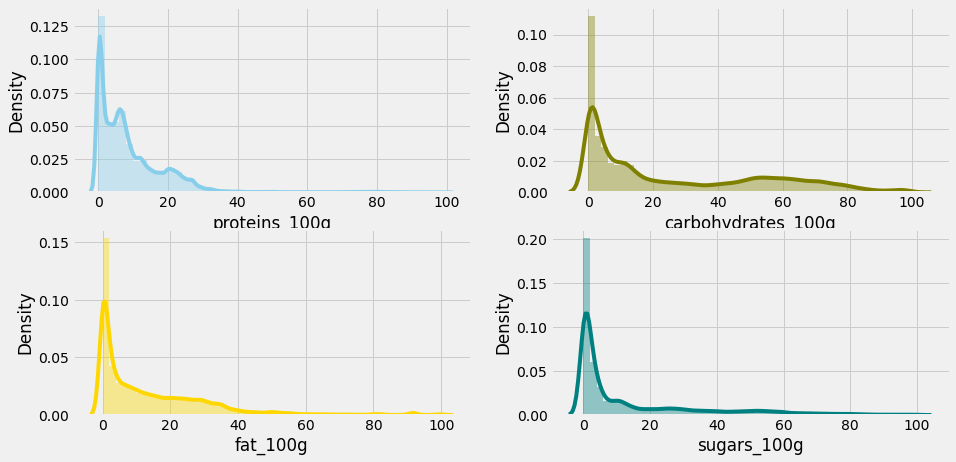

In [142]:
f, axes = plt.subplots(2, 2, figsize=(14, 7))
sns.distplot( data["proteins_100g"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data["carbohydrates_100g"] , color="olive", ax=axes[0, 1])
sns.distplot( data["fat_100g"] , color="gold", ax=axes[1, 0])
sns.distplot( data["sugars_100g"] , color="teal", ax=axes[1, 1])
plt.show()

In [143]:
data[data["sugars_100g"] > 100]["sugars_100g"]

Series([], Name: sugars_100g, dtype: float64)

In [144]:
error = data[data["sugars_100g"] > data["carbohydrates_100g"] ]

In [145]:
print(len(error))
print(str(len(error)/len(data)*100) + "%")

135
0.02076689848678533%


In [146]:
error[["sugars_100g","carbohydrates_100g"]]

,sugars_100g,carbohydrates_100g
21514,57.142857,6.00
188266,0.010000,0.00
197424,2.000000,0.00
226702,4.300000,0.00
286123,1.900000,1.00
...,...,...
1378557,3.400000,0.00
1413080,2.000000,1.60
1462853,81.000000,0.00
1467987,66.000000,0.00


In [147]:
error = data[data["fat_100g"] < data["saturated-fat_100g"]]

In [148]:
print(len(error))
print(str(len(error)/len(data)*100) + "%")

117
0.017997978688547286%


In [149]:
error[["fat_100g","saturated-fat_100g"]]

,fat_100g,saturated-fat_100g
225622,13.00,20.30
237865,23.50,49.00
275028,13.00,39.00
285271,0.00,3.33
359245,0.00,1.67
...,...,...
1428080,0.00,0.10
1457314,1.50,2.50
1458049,0.00,2.00
1459030,0.00,6.67


In [150]:
val1 = data.shape[0] 

index = data[data["sugars_100g"] > data["carbohydrates_100g"] ].index
data.drop(index, inplace=True)

val2 = data.shape[0]

print("Number of dropped product: " + str(val1 - val2))

Number of dropped product: 135


In [151]:
print("Percentage of dropped product: " + str(round(((val1 - val2) / val1)*100,2)) + "%") 

Percentage of dropped product: 0.02%


In [152]:
val1 = data.shape[0] 

index = data[data["fat_100g"] < data["saturated-fat_100g"]].index
data.drop(index, inplace=True)

val2 = data.shape[0]

print("Number of dropped product: " + str(val1 - val2))

Number of dropped product: 109


In [153]:
print("Percentage of dropped product: " + str(round(((val1 - val2) / val1)*100,2)) + "%") 

Percentage of dropped product: 0.02%


### Salt

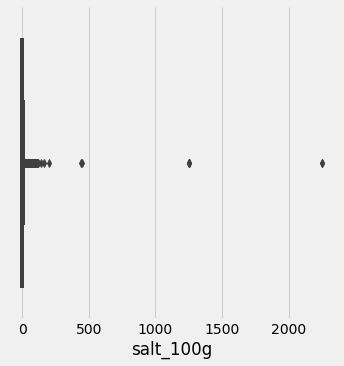

In [154]:
sns.catplot(x = "salt_100g" , data = data, kind = "box")
plt.show()

In [155]:
error = data[data["salt_100g"]  >= 100]

In [156]:
print(len(error))
print(str(len(error)/len(data)*100) + "%")

221
0.03400894696912572%


In [157]:
error

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,packaging_text,brands,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
24731,16000144811,http://world-en.openfoodfacts.org/product/0016...,kiliweb,1562410644,2019-07-06T10:57:24Z,1594591986,2020-07-12T22:13:06Z,reesés puffs,NaN,NaN,NaN,NaN,reese's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,35.0,4.0,2.0,16.0,8.0,2.0,100.0
141914,580113,http://world-en.openfoodfacts.org/product/0058...,kiliweb,1532937243,2018-07-30T07:54:03Z,1579778861,2020-01-23T11:27:41Z,unsweetenrd sunflower seed spread,NaN,NaN,NaN,NaN,trader joe's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,630.0,48.0,6.0,12.0,3.0,21.0,100.0
145146,59749873543,http://world-en.openfoodfacts.org/product/0059...,kiliweb,1518638804,2018-02-14T20:06:44Z,1518639300,2018-02-14T20:15:00Z,cherry cerise jelly powder,NaN,NaN,NaN,NaN,selection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,400.0,0.0,0.0,19.0,18.0,1.0,100.0
153724,65912006243,http://world-en.openfoodfacts.org/product/0065...,kiliweb,1554812089,2019-04-09T12:14:49Z,1582906941,2020-02-28T16:22:21Z,clamato,NaN,NaN,NaN,NaN,mott's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-fa

In [158]:
val1 = data.shape[0] 

index = data[data["salt_100g"]  >= 100].index
data.drop(index, inplace=True)

val2 = data.shape[0]
print("Number of dropped product: " + str(val1 - val2))

Number of dropped product: 221


In [159]:
print("Percentage of dropped product: " + str(round(((val1 - val2) / val1)*100,2)) + "%") 

Percentage of dropped product: 0.03%


### Energy

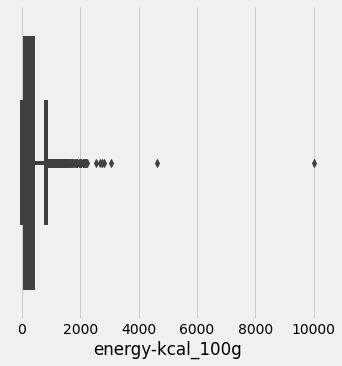

In [160]:
sns.catplot(x = "energy-kcal_100g" , data = data, kind = "box")
plt.show()

Max value 
* fat = 9 kcal per g

100g of fat = 100*9 = 900 kcal max

https://fr.wikipedia.org/wiki/Valeur_%C3%A9nerg%C3%A9tique



In [161]:
data[data["energy-kcal_100g"] >900]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,packaging_text,brands,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
47,0000000004206,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1550479590,2019-02-18T08:46:30Z,1550479594,2019-02-18T08:46:34Z,saucisse au chou fumé bbc sv (morteau),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,964.0,25.000000,9.700000,1.000000,0.100000,20.000000,2.6000
1290,00010016,http://world-en.openfoodfacts.org/product/0001...,kiliweb,1592390161,2020-06-17T10:36:01Z,1592391132,2020-06-17T10:52:12Z,chipolatas,NaN,"fr:Film en plastique, fr:Barquette, fr:Etui en...","fr-film-en-plastique,fr-barquette,fr-etui-en-c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FR 31.091.010 EC,fr-31-091-010-ec,"43.733333,1.416667",NaN,bruguieres-haute-garonne-france,NaN,NaN,france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,932.0,17.799999,7.200000,0.600000,0.600000,15.500000,1.6900
1295,000100755,http://world-en.openfoodfacts.org/product/0001...,kiliweb,1593109797,2020-06-25T18:29:57Z,1593109798,2020-06-25T18:29:58Z,proteine de regime superieure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,920.0,8.000000,3.000000,6.500000,3.000000,4.800000,0.6700
1321,000108138,http://world-en.openfoodfacts.org/product/0001...,kiliweb,1598950828,2020-09-01T09:00:28Z,1598950829,2020-09-01T09:00:29Z,petit dejeuner complet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [162]:
data[data["product_name"] == "beurre"]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,packaging_text,brands,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
63986,342506,http://world-en.openfoodfacts.org/product/0034...,kiliweb,1521530075,2018-03-20T07:14:35Z,1578933782,2020-01-13T16:43:02Z,beurre,NaN,NaN,NaN,NaN,marks & spencer,"Produits laitiers, Produits à tartiner, Matièr...","en:dairies,en:spreads,en:fats,en:spreadable-fa...","Dairies,Spreads,Fats,Spreadable fats,Animal fa...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,france,"Beurre (_lait_),sel (1,7%).",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,26.0,e,2.0,Fat and sauces,Fats,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,en:butters,Butters,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,737.0,81.7,54.0,0.1,0.1,0.5,1.70
260246,0204984008049,http://world-en.openfoodfacts.org/product/0204...,kiliweb,1525502834,2018-05-05T06:47:14Z,1582746678,2020-02-26T19:51:18Z,beurre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:organic,en:organic,Organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,743.0,82.0,55.0,0.6,0.6,0.7,0.40
260249,0204984016303,http://world-en.openfoodfacts.org/product/0204...,kiliweb,1553185739,2019-03-21T16:28:59Z,1582749647,2020-02-26T20:40:47Z,beurre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Organic, Palm oil free, fr:ab-agriculture-biol...","en:organic,en:eu-organic,en:ab-agriculture-bio...","Organic,EU Organic,AB Agriculture Biologique,P...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,621.0,70.0,16.0,0.0,0.0,0.0,0.50
272280,213525019352,http://world-en.openfoodfacts.org/product/0213...,kiliweb,1553444334,2019-03-24T16:18:54Z,1553444337,2019-03-24T16:18:57Z,beurre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,franc

In [163]:
data[data["product_name"] == "beurre"]["energy-kcal_100g"].mean()

691.34375

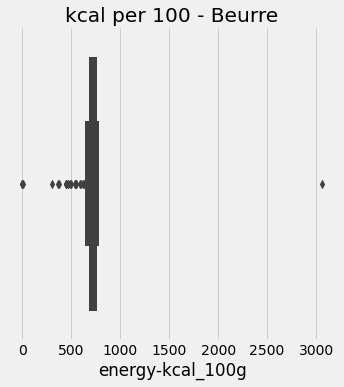

In [164]:
sns.catplot(x = "energy-kcal_100g" , data = data[data["product_name"] == "beurre"], kind = "box")
plt.title("kcal per 100 - Beurre")
plt.show()

In [165]:
data.loc[data["energy-kcal_100g"] >900,"energy-kcal_100g"] = np.nan
data.loc[data["energy-kcal_100g"] >900]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,packaging_text,brands,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g


In [166]:
data.loc[data["energy-kcal_100g"] <= 0]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,packaging_text,brands,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
28,0000000001663,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1509478049,2017-10-31T19:27:29Z,1509478053,2017-10-31T19:27:33Z,crème dessert chocolat,NaN,NaN,NaN,NaN,ferme de la frémondière,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,france,"Lait entier, sucre, amidon de maïs, cacao, Aga...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,en:e406,E406 - Agar,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4.0,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,0000000020114,http://world-en.openfoodfacts.org/product/0000...,chris13,1502444009,2017-08-11T09:33:29Z,1561463808,2019-06-25T11:56:48Z,naturablue original,250 ml,"bocal,plastique","bocal,plastique",NaN,natura4ever,Compléments alimentaires,en:dietary-supplements,Dietary supplements,NaN,NaN,France,france,Fabriqué en France,en:made-in-france,Made in France,NaN,NaN,NaN,NaN,NaN,France,NaN,france,"Glycérine d'origine naturelle (stabilisant), s...",NaN,NaN,NaN,NaN,NaN,16 ml,16.0,NaN,1.0,NaN,en:e422,E422 - Glycerol,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4.0,unknown,unknown,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","To be checked,Complete,Nutrition facts complet...",NaN,en:dietary-supplements,Dietary supplements,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,0.0,0.0,0.0,0.0,0.0,0.0,NaN
475,00000131,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1593520188,2020-06-30T12:29:48Z,1593520193,2020-06-30T12:29:53Z,confiture de fraise mara des bois,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,0.0,0.0,0.0,58.0,58.0,0.0,0.0
535,0000023149090,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1526750772,2018-05-19T17:26:12Z,1561464090,2019-06-25T12:01:30Z,baguet

In [167]:
data.loc[data["energy-kcal_100g"] <= 0,"energy-kcal_100g"] = np.nan
data.loc[data["energy-kcal_100g"] <= 0]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,packaging_text,brands,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries_tags,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g


## Missing values

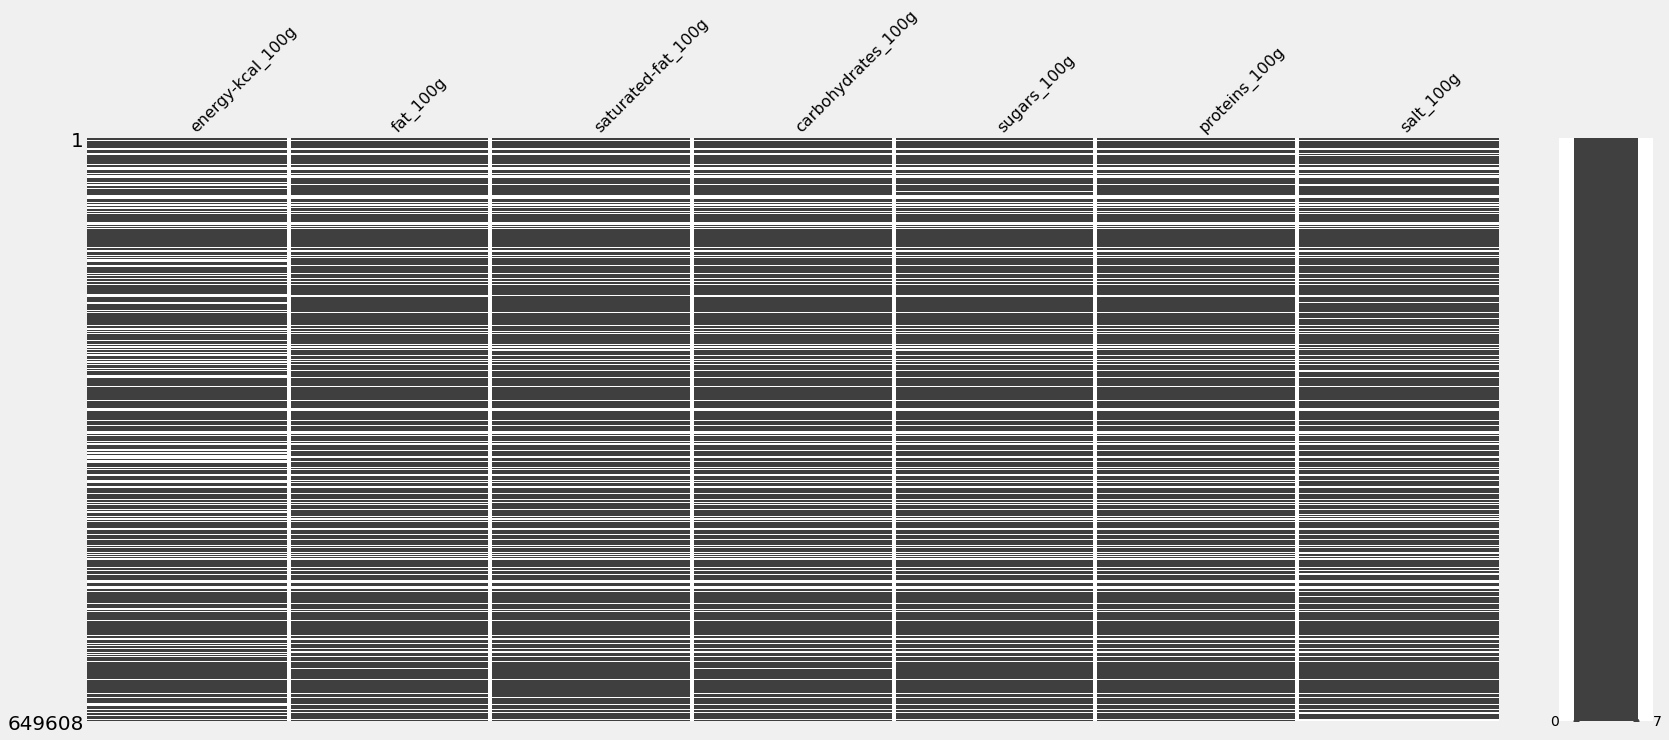

In [168]:
col_nutrition = data.filter(regex=("100g")).columns

msno.matrix(data[col_nutrition])
plt.show()


# DROP FULL NA

In [169]:
col_name = data.filter(regex=("name"))
col_date = data["created_datetime"]
col_grade = data["nutriscore_grade"]
data_nutrition = data[col_nutrition]


* conservation prodcut avec +50% informations (4/7 col)

In [170]:
data_nutrition.dropna(axis = 0, thresh=4, inplace = True)
index = data_nutrition.index

In [171]:
keep = col_name.index.isin(index)
col_name = col_name[keep]

keep = col_date.index.isin(index)
col_date = col_date[keep]

keep = col_grade.index.isin(index)
col_grade = col_grade[keep]

In [172]:
data = pd.concat([col_date,col_name,data_nutrition, col_grade], axis = 1)
data.head(5)

,created_datetime,product_name,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutriscore_grade
0,2018-06-15T10:38:00Z,vitória crackers,375.0,7.0,3.08,70.1,15.0,7.8,1.40,NaN
3,2015-10-11T14:09:21Z,moutarde au moût de raisin,NaN,8.2,2.20,29.0,22.0,5.1,4.60,d
5,2018-08-31T17:53:02Z,sauce sweety chili 0%,21.0,0.0,0.00,4.8,0.4,0.2,2.04,NaN
6,2018-11-17T12:05:32Z,mini coco,60.0,3.0,1.00,10.0,3.0,2.0,1.15,NaN
13,2018-04-11T10:00:13Z,salade de carottes râpées,32.0,0.3,0.10,5.3,3.9,0.9,0.42,b


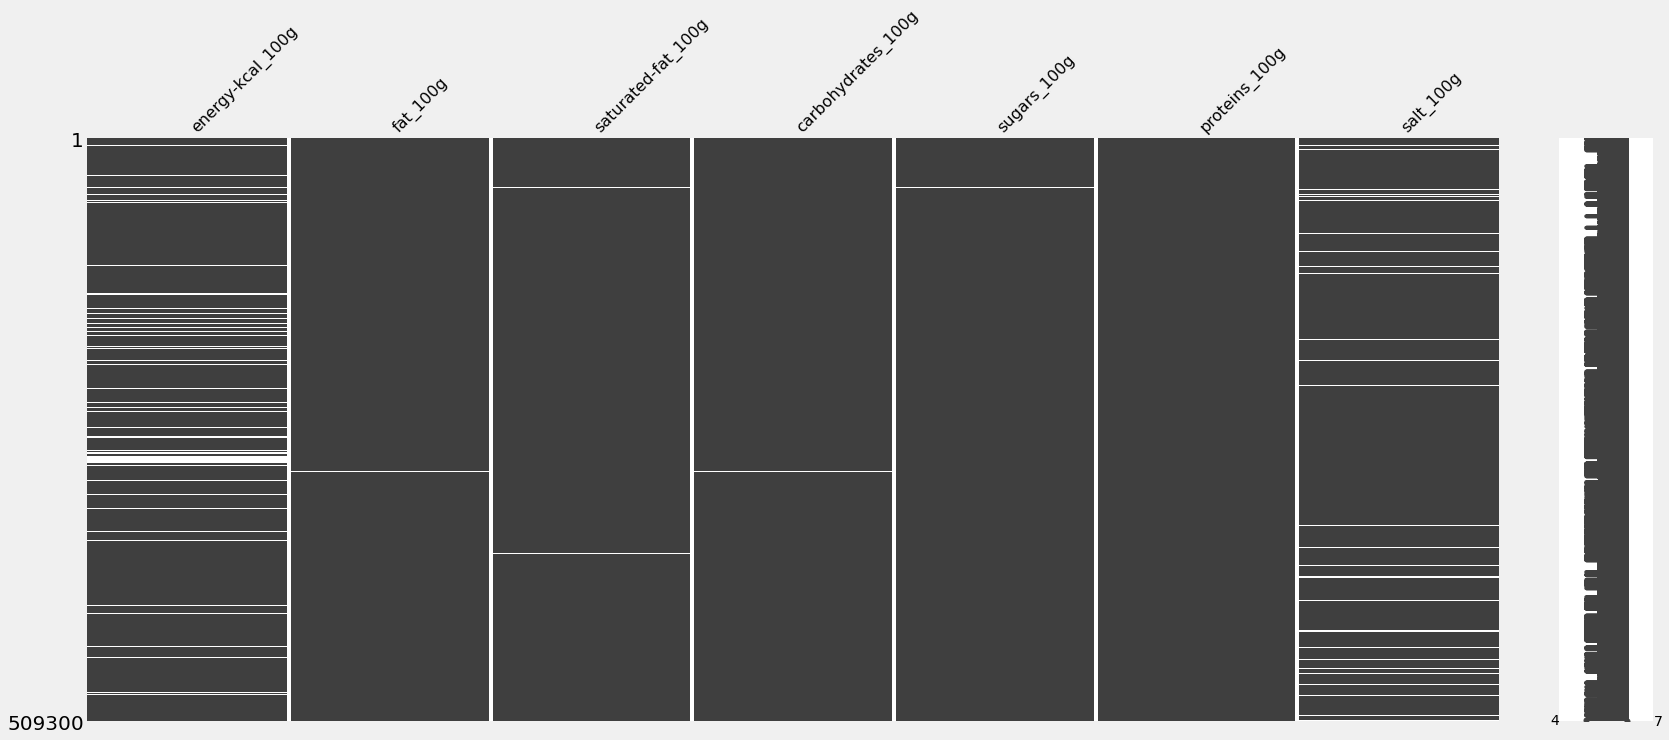

In [173]:
msno.matrix(data[col_nutrition])
plt.show()

## KNN imputer

In [174]:
from sklearn.impute import KNNImputer

col_nutrition = data.filter(regex=("100g")).columns

X = data[col_nutrition]

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [175]:
# fit on the dataset
imputer.fit(X)

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=5, weights='uniform')

In [176]:
# transform the dataset
Xtrans = imputer.transform(X)

In [177]:
data_nutrition = pd.DataFrame(Xtrans, columns= col_nutrition)
data_nutrition.head()

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
0,375.0,7.0,3.08,70.1,15.0,7.8,1.40
1,204.8,8.2,2.20,29.0,22.0,5.1,4.60
2,21.0,0.0,0.00,4.8,0.4,0.2,2.04
3,60.0,3.0,1.00,10.0,3.0,2.0,1.15
4,32.0,0.3,0.10,5.3,3.9,0.9,0.42


# Final data frame

In [178]:
col_name = data.filter(regex=("name")).reset_index(drop = True)
col_date = data["created_datetime"].reset_index(drop = True)
col_grade = data["nutriscore_grade"].reset_index(drop = True)

In [179]:
data_france = pd.concat([col_date,col_name,data_nutrition, col_grade], axis = 1)
data_france.head(5)

,created_datetime,product_name,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutriscore_grade
0,2018-06-15T10:38:00Z,vitória crackers,375.0,7.0,3.08,70.1,15.0,7.8,1.40,NaN
1,2015-10-11T14:09:21Z,moutarde au moût de raisin,204.8,8.2,2.20,29.0,22.0,5.1,4.60,d
2,2018-08-31T17:53:02Z,sauce sweety chili 0%,21.0,0.0,0.00,4.8,0.4,0.2,2.04,NaN
3,2018-11-17T12:05:32Z,mini coco,60.0,3.0,1.00,10.0,3.0,2.0,1.15,NaN
4,2018-04-11T10:00:13Z,salade de carottes râpées,32.0,0.3,0.10,5.3,3.9,0.9,0.42,b


In [180]:
data_france[data_france["sugars_100g"] > data_france["carbohydrates_100g"] ].shape[0]

705

In [181]:
data_france[data_france["fat_100g"] < data_france["saturated-fat_100g"] ].shape[0]

381

In [182]:
data_france[data_france["salt_100g"]  >= 100].shape[0]

0

In [183]:
data_france[data_france["energy-kcal_100g"] == 0].shape[0]

0

In [184]:
val1 = data_france.shape[0] 

index = data_france[data_france["sugars_100g"] > data_france["carbohydrates_100g"] ].index
data_france.drop(index, inplace=True)

val2 = data_france.shape[0]

print("Number of dropped product: " + str(val1 - val2))

Number of dropped product: 705


In [185]:
print("Percentage of dropped product: " + str(round(((val1 - val2) / val1)*100,2)) + "%") 

Percentage of dropped product: 0.14%


In [186]:
val1 = data_france.shape[0] 

index = data_france[data_france["fat_100g"] < data_france["saturated-fat_100g"] ].index
data_france.drop(index, inplace=True)

val2 = data_france.shape[0]

print("Number of dropped product: " + str(val1 - val2))

Number of dropped product: 168


In [187]:
print("Percentage of dropped product: " + str(round(((val1 - val2) / val1)*100,2)) + "%") 

Percentage of dropped product: 0.03%


In [188]:
val1 = data_france.shape[0] 

index = data_france[data_france["salt_100g"]  >= 100].index
data_france.drop(index, inplace=True)

val2 = data_france.shape[0]
print("Number of dropped product: " + str(val1 - val2))

Number of dropped product: 0


In [189]:
print("Percentage of dropped product: " + str(round(((val1 - val2) / val1)*100,2)) + "%") 

Percentage of dropped product: 0.0%


In [190]:
val1 = data_france.shape[0] 

index = data_france[data_france["energy-kcal_100g"] <= 0].index
data_france.drop(index, inplace=True)

val2 = data_france.shape[0]
print("Number of dropped product: " + str(val1 - val2))

Number of dropped product: 0


In [191]:
print("Percentage of dropped product: " + str(round(((val1 - val2) / val1)*100,2)) + "%") 

Percentage of dropped product: 0.0%


In [192]:
data_france.isna().sum()

created_datetime           0
product_name             909
energy-kcal_100g           0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
proteins_100g              0
salt_100g                  0
nutriscore_grade      302666
dtype: int64

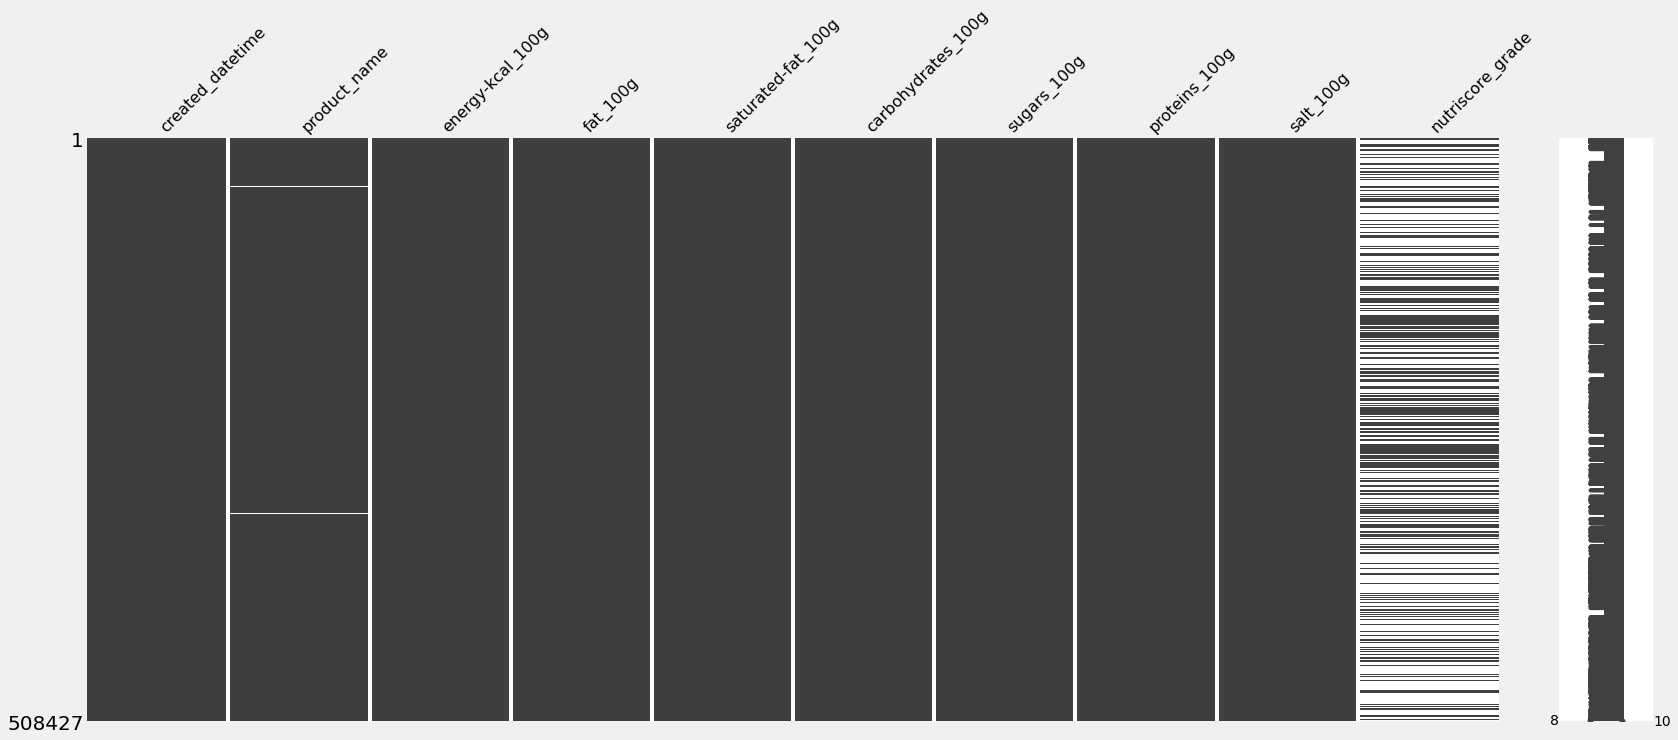

In [193]:
msno.matrix(data_france)
plt.show()

In [194]:
data_france.shape

(508427, 10)

In [195]:
endlen = data_france.shape[0]

print("Number of dropped products: "+ str(startinglen - endlen))
print("Percentage of dropped products: " + str(round(((startinglen - endlen) / startinglen)*100,2)) + "%") 

Number of dropped products: 977620
Percentage of dropped products: 65.79%


In [196]:
data_france.to_csv("/content/drive/My Drive/DATASETS/ML/P2/data_france.csv", index=False)
